In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

# Statistical Models
import statsmodels.tsa.stattools as sts
from scipy.stats.distributions import chi2 
from statsmodels.tsa.arima_model import ARMA
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.graphics.tsaplots as sgt

# lstm autoencoder recreate sequence
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
from keras.layers import TimeDistributed
from keras.layers.core import Dense, Activation, Dropout

from sklearn.preprocessing import MinMaxScaler
import sklearn.gaussian_process as gp


import math
import itertools
import pandas as pd
import numpy as np
from scipy.stats import boxcox, kurtosis, skew
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight') 
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

%matplotlib inline

In [89]:
import pandas as pd

# Load the CSV file into a DataFrame
csv_file_path = r'C:\Users\arjd2\OneDrive\Documents\GitHub\JPMC_Quant_Research\task1\data\Nat_Gas.csv'
df = pd.read_csv(csv_file_path)

# Rename the columns using a dictionary
df = df.rename(columns={'Dates': 'date', 'Prices': 'price'})

# Check the column names to ensure they are correct
print(df.columns)

# Set the index to a datetime index using the 'Date' column
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Drop the 'Date' column (optional, if you don't need it as a separate column)
# df = df.drop(columns=['Date'])

# Display the first few rows of the DataFrame
df.head()



Index(['date', 'price'], dtype='object')


,price
date,
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


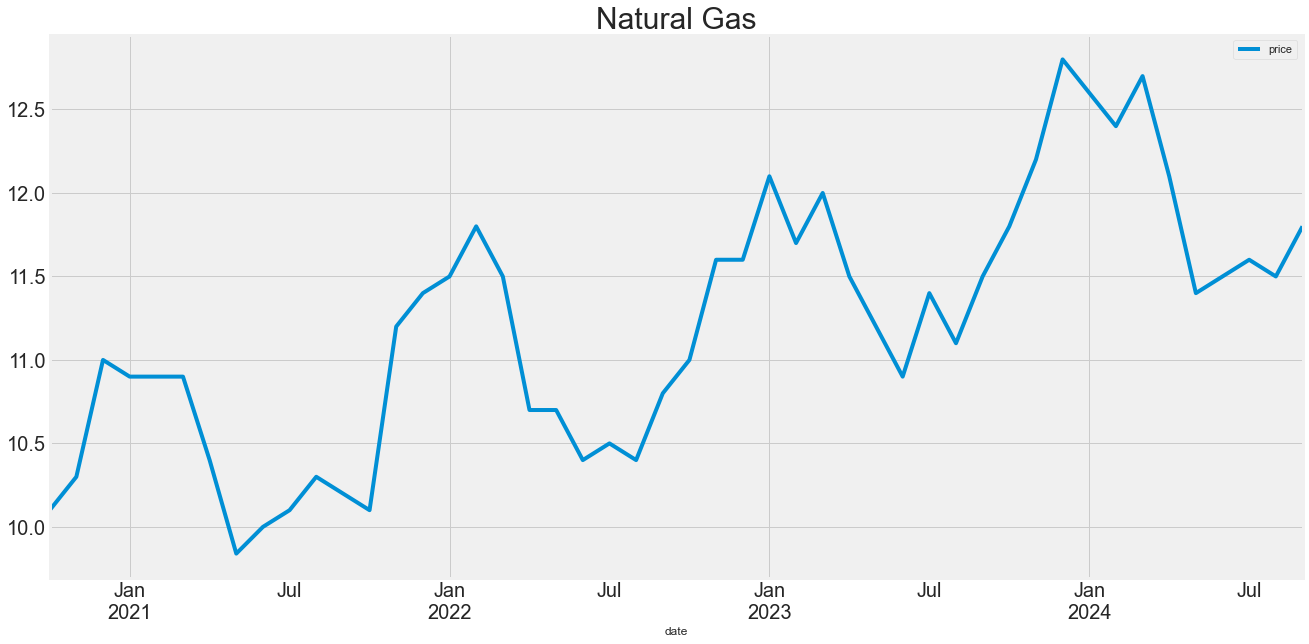

In [90]:
df.plot(figsize=(20, 10), fontsize=20)
plt.title('Natural Gas', fontsize=30)
plt.show()

Lambda Value 0.009795690495088862


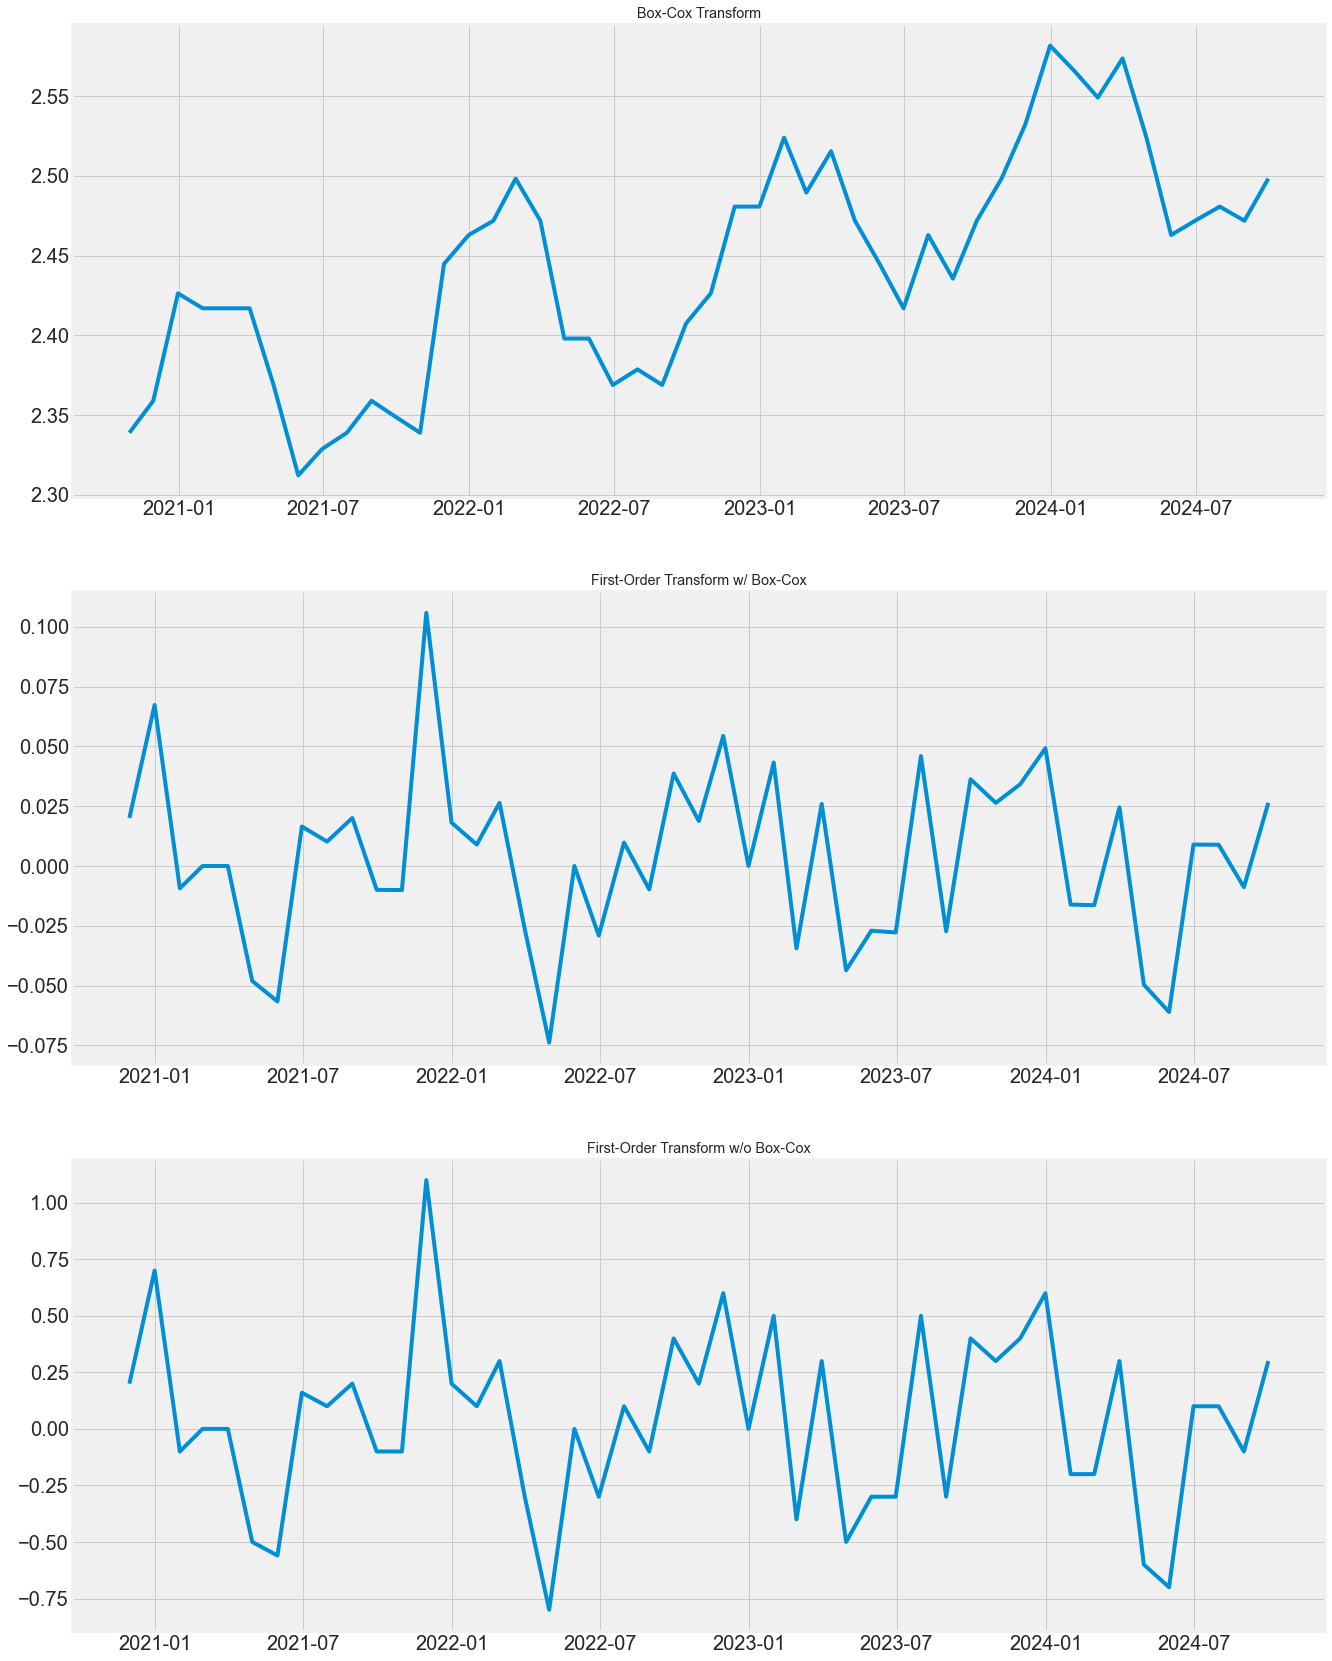

In [91]:
df['bc_price'], lamb = boxcox(df.price)
df['df1_price'] = df['bc_price'].diff()
df['df_price'] = df['price'].diff()
fig = plt.figure(figsize=(20,40))

bc = plt.subplot(411)
bc.plot(df.bc_price)
bc.title.set_text('Box-Cox Transform')
df1 = plt.subplot(412)
df1.plot(df.df1_price)
df1.title.set_text('First-Order Transform w/ Box-Cox')
df2 = plt.subplot(413)
df2.plot(df.df_price)
df2.title.set_text('First-Order Transform w/o Box-Cox')

df.bc_price.dropna(inplace=True)
df.df1_price.dropna(inplace=True)
df.df_price.dropna(inplace=True)

print(f'Lambda Value {lamb}')

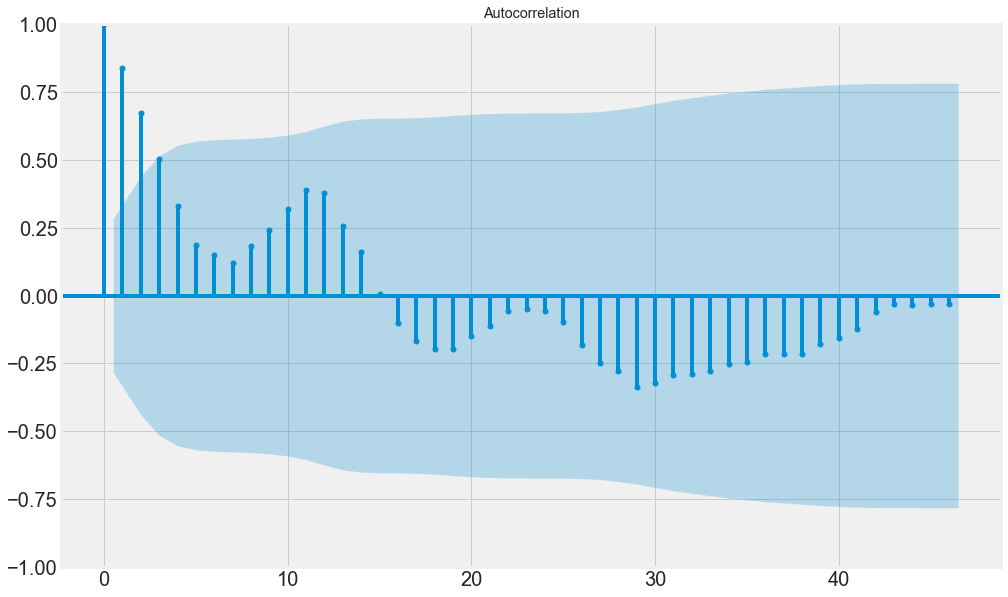

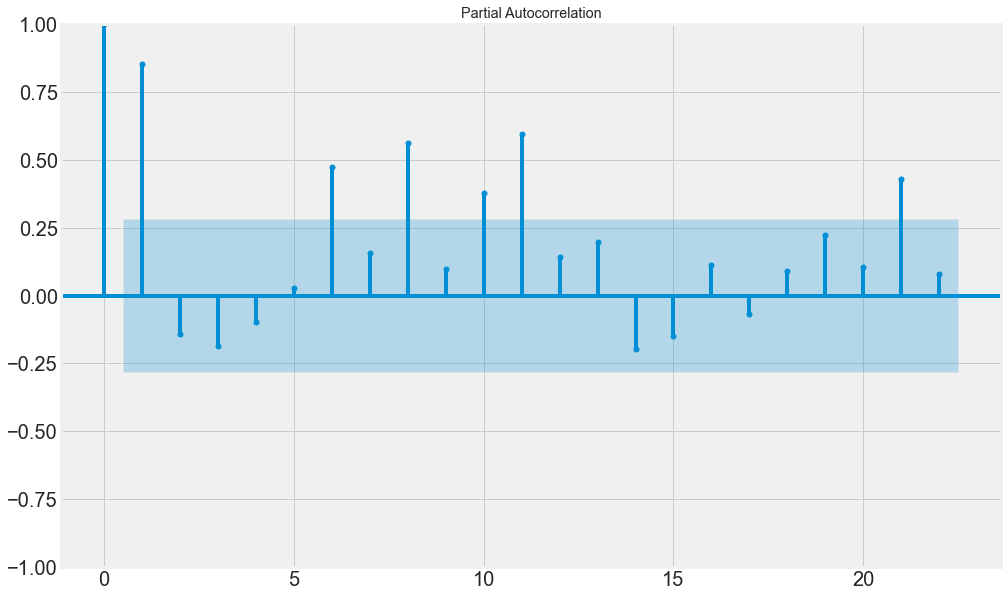

In [92]:
f_acf = plot_acf(df['price'], lags=46)
f_pacf = plot_pacf(df['price'], lags=22, method='ols')
f_acf.set_figheight(10)
f_acf.set_figwidth(15)
f_pacf.set_figheight(10)
f_pacf.set_figwidth(15)
plt.show()

# sgt.plot_acf(df['price'], zero = False, lags = 46)
# plt.title("ACF for Returns", size = 24)
# plt.show()
# # MA p = 5/7

Total: (48, 4)
Train: (38, 4)
Test: (10, 4)
Test start: 39
Test end: 48


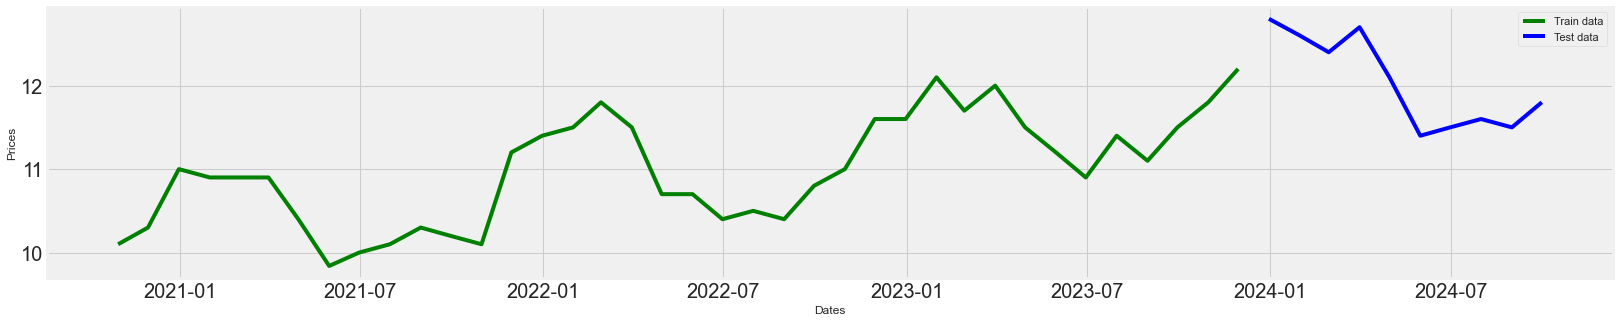

In [93]:

train_len = round(len(df)*0.8)
test_len = round(len(df)*0.2)

data_test = df.iloc[train_len:]
data_train = df.iloc[:train_len]

test_start = data_train.shape[0] + 1
test_end = df.shape[0]

print(f"Total: {df.shape}")
print(f"Train: {data_train.shape}")
print(f"Test: {data_test.shape}")
print(f"Test start: {test_start}")
print(f"Test end: {test_end}")

plt.figure(figsize=(25,5))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(data_train.price, 'green', label='Train data')
plt.plot(data_test.price, 'blue', label='Test data')
plt.legend()

In [94]:
model = SARIMAX(data_train.price, order=(7, 0, 0), seasonal_order=(7, 0, 0, 12))
model_fit = model.fit(disp=False) 

KeyboardInterrupt: 

Mean Squared Error: 0.0703142342533435
Root Mean Squared Error: 0.2651683130642564
Mean Absolute Error: 0.2042608834015148


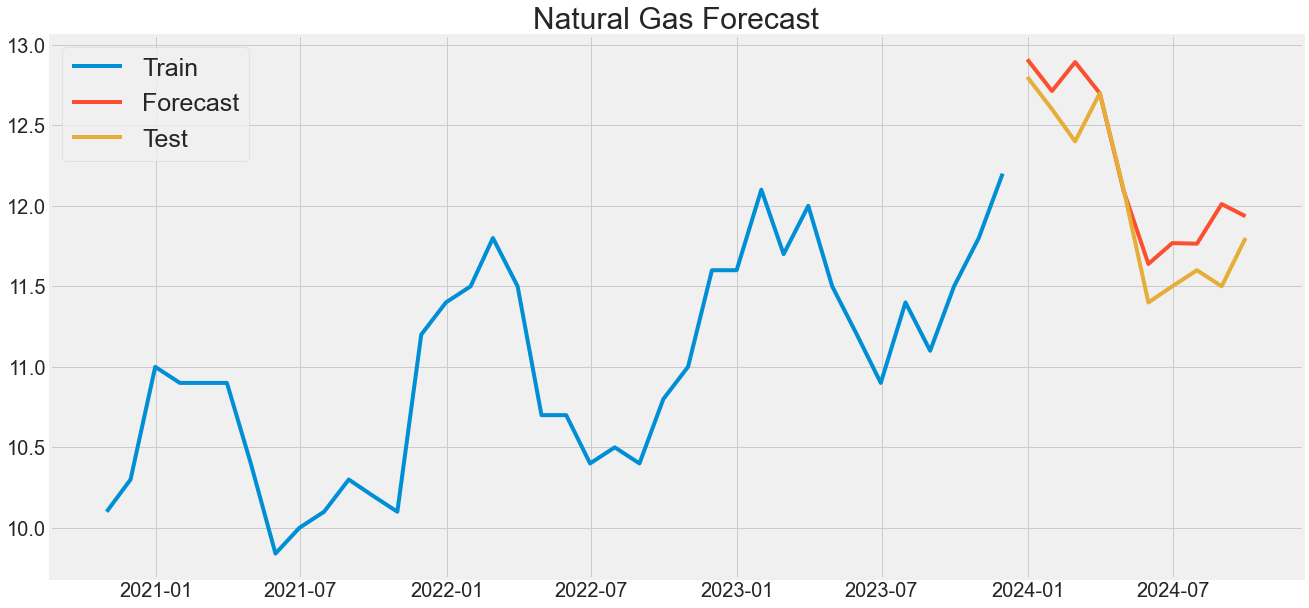

In [ ]:
fcast_len = len(data_test.price)
fcast = model_fit.forecast(fcast_len)
mse = mean_squared_error(data_test.price, fcast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(data_test.price, fcast)
plt.figure(figsize=(20, 10))
plt.title('Natural Gas Forecast', fontsize=30)
plt.plot(data_train.price, label='Train')
plt.plot(fcast, label='Forecast')
plt.plot(data_test.price, label='Test')

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
plt.legend(fontsize=25)
plt.show()


In [ ]:
data_test.index[0]
# 2023-12-31    

Timestamp('2023-12-31 00:00:00')

In [ ]:
# Define the starting date
start_date = data_test.index[0]  # Replace with your desired start date

# Create a date range for the next 12 months with the end of each month
end_of_month_dates = pd.date_range(start=start_date, periods=36, freq='M')

# # Print the end-of-month dates
# for date in end_of_month_dates:
#     print(date.strftime('%d-%m-%Y'))

df_test_future = pd.DataFrame({'date': end_of_month_dates})
df_test_future = df_test_future.set_index('date')
df_test_future

""
date
2023-12-31
2024-01-31
2024-02-29
2024-03-31
2024-04-30
...
2026-07-31
2026-08-31
2026-09-30


In [ ]:
future_fcast_len = len(df_test_future)
future_fcast = model_fit.forecast(future_fcast_len)
print(len(future_fcast))
print(future_fcast[0])

36
12.909361821734183


Mean Squared Error: 0.0703142342533435
Root Mean Squared Error: 0.2651683130642564
Mean Absolute Error: 0.2042608834015148


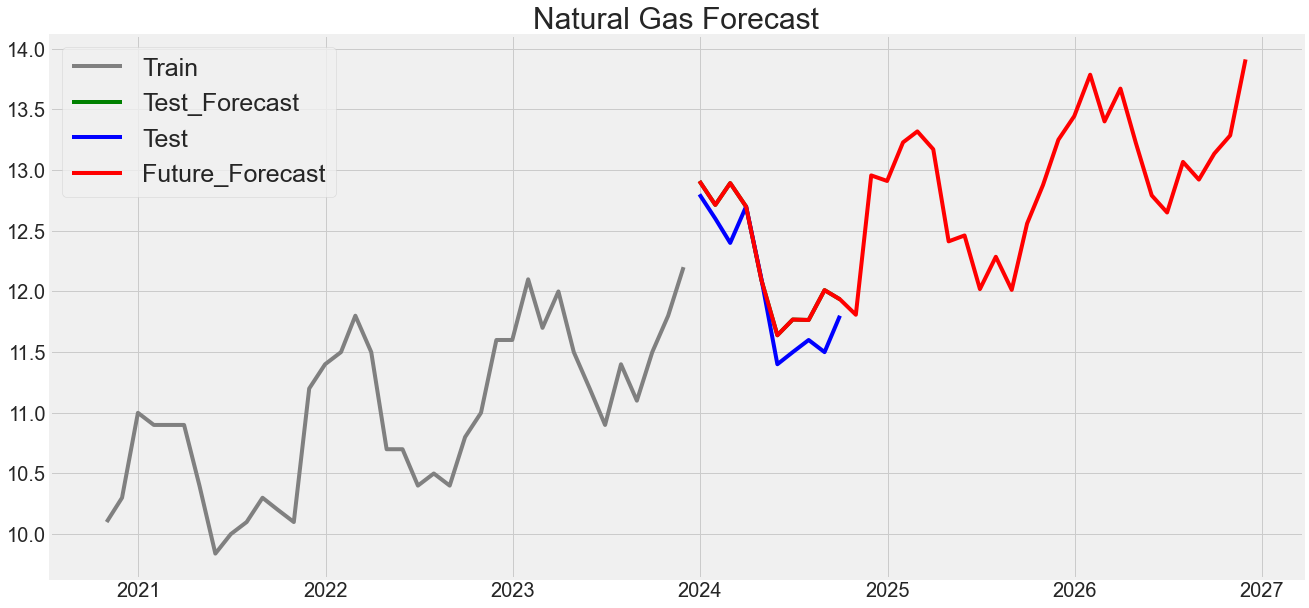

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.title('Natural Gas Forecast', fontsize=30)

# Plot the 'Train' line in grey
plt.plot(data_train.price, label='Train', color='grey')

# Plot the 'Test_Forecast' line in green
plt.plot(fcast, label='Test_Forecast', color='green')

# Plot the 'Test' line in blue
plt.plot(data_test.price, label='Test', color='blue')

# Plot the 'Future_Forecast' line in red
plt.plot(future_fcast, label='Future_Forecast', color='red')

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')

plt.legend(fontsize=25)
plt.show()


In [ ]:
future_fcast_len = len(df_test_future)
future_fcast = model_fit.forecast(future_fcast_len)
print(len(future_fcast))

# Add 'future_fcast' values to the 'price' column in the DataFrame
df_test_future['price'] = future_fcast

# Print the resulting DataFrame
df_test_future['price'].isna().sum()
print(len(df_test_future))

print(df_test_future)


36
36
                price
date                 
2023-12-31  12.909362
2024-01-31  12.713117
2024-02-29  12.892656
2024-03-31  12.699115
2024-04-30  12.091772
2024-05-31  11.639149
2024-06-30  11.768465
2024-07-31  11.764798
2024-08-31  12.010803
2024-09-30  11.935145
2024-10-31  11.808117
2024-11-30  12.956102
2024-12-31  12.910392
2025-01-31  13.228167
2025-02-28  13.318603
2025-03-31  13.171150
2025-04-30  12.412618
2025-05-31  12.461297
2025-06-30  12.019413
2025-07-31  12.285534
2025-08-31  12.012897
2025-09-30  12.559716
2025-10-31  12.876696
2025-11-30  13.249852
2025-12-31  13.444690
2026-01-31  13.785819
2026-02-28  13.400921
2026-03-31  13.671296
2026-04-30  13.224380
2026-05-31  12.791410
2026-06-30  12.650643
2026-07-31  13.067202
2026-08-31  12.921504
2026-09-30  13.135365
2026-10-31  13.285508
2026-11-30  13.911880


In [ ]:
data_test

,price,bc_price,df1_price,df_price
date,,,,
2023-12-31,12.8,2.581546,0.049212,0.6
2024-01-31,12.6,2.565401,-0.016145,-0.2
2024-02-29,12.4,2.549000,-0.016401,-0.2
2024-03-31,12.7,2.573505,0.024505,0.3
2024-04-30,12.1,2.523900,-0.049605,-0.6
2024-05-31,11.4,2.462853,-0.061048,-0.7
2024-06-30,11.5,2.471797,0.008945,0.1
2024-07-31,11.6,2.480665,0.008868,0.1
2024-08-31,11.5,2.471797,-0.008868,-0.1


In [99]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Given datetime object
original_datetime = data_test.index[-1]

# Add one month to the datetime object
new_datetime = original_datetime + relativedelta(months=1)

# Define the starting date
start_date = new_datetime  # Replace with your desired start date

# Create a date range for the next 12 months with the end of each month
end_of_month_dates = pd.date_range(start=start_date, periods=24, freq='M')

# # Print the end-of-month dates
# for date in end_of_month_dates:
#     print(date.strftime('%d-%m-%Y'))

df_future = pd.DataFrame({'date': end_of_month_dates})
df_future = df_future.set_index('date')
df_future

""
date
2024-10-31
2024-11-30
2024-12-31
2025-01-31
2025-02-28
...
2026-05-31
2026-06-30
2026-07-31


In [100]:
import pandas as pd

# Assuming 'df' is your original DataFrame and 'df_future' is your DataFrame with 'price_pred'
# Ensure that both DataFrames have the same index (date)
# You can reset the index in 'df_future' if needed
# df_future.reset_index(inplace=True)

# Combine the indexes from both DataFrames
combined_index = df.index.union(df_future.index)

# Create a new DataFrame with the desired columns
new_df = pd.DataFrame(columns=['date', 'price', 'price_pred'])

# Copy 'date' and 'price' columns from 'df' to the new DataFrame
new_df['date'] = combined_index # Assuming 'date' is the index in 'df'
new_df.set_index('date', inplace=True)
new_df['price'] = df['price']  # Replace 'price' with the actual column name in 'df'

# Copy 'price_pred' from 'df_future' to the new DataFrame
new_df['price_pred'] = df_test_future  # Replace 'price_pred' with the actual column name in 'df_future'

# Print the new DataFrame
print(new_df)



            price  price_pred
date                         
2020-10-31   10.1         NaN
2020-11-30   10.3         NaN
2020-12-31   11.0         NaN
2021-01-31   10.9         NaN
2021-02-28   10.9         NaN
...           ...         ...
2026-05-31    NaN   12.791410
2026-06-30    NaN   12.650643
2026-07-31    NaN   13.067202
2026-08-31    NaN   12.921504
2026-09-30    NaN   13.135365

[72 rows x 2 columns]


In [101]:
df['price']

date
2020-10-31    10.10
2020-11-30    10.30
2020-12-31    11.00
2021-01-31    10.90
2021-02-28    10.90
2021-03-31    10.90
2021-04-30    10.40
2021-05-31     9.84
2021-06-30    10.00
2021-07-31    10.10
2021-08-31    10.30
2021-09-30    10.20
2021-10-31    10.10
2021-11-30    11.20
2021-12-31    11.40
2022-01-31    11.50
2022-02-28    11.80
2022-03-31    11.50
2022-04-30    10.70
2022-05-31    10.70
2022-06-30    10.40
2022-07-31    10.50
2022-08-31    10.40
2022-09-30    10.80
2022-10-31    11.00
2022-11-30    11.60
2022-12-31    11.60
2023-01-31    12.10
2023-02-28    11.70
2023-03-31    12.00
2023-04-30    11.50
2023-05-31    11.20
2023-06-30    10.90
2023-07-31    11.40
2023-08-31    11.10
2023-09-30    11.50
2023-10-31    11.80
2023-11-30    12.20
2023-12-31    12.80
2024-01-31    12.60
2024-02-29    12.40
2024-03-31    12.70
2024-04-30    12.10
2024-05-31    11.40
2024-06-30    11.50
2024-07-31    11.60
2024-08-31    11.50
2024-09-30    11.80
Name: price, dtype: float64